In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [56]:
#create all categorical variables that we did above for both training and test sets 
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 

#all_data.Age = all_data.Age.fillna(training.Age.mean())
df.Age = df.Age.fillna(df.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
df.Fare = df.Fare.fillna(df.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
df.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
df['norm_sibsp'] = np.log(df.SibSp+1)
#df['norm_sibsp'].hist()

# log norm of fare (used)
df['norm_fare'] = np.log(df.Fare+1)
#df['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
X = pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

#Split to train test again

y = df['Survived']


In [62]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1)

# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]

# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))
X_train_mixed[:,:4]

model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)
# get labels for entire training dataset data
tran_labels = model.transduction_

array([[20.        ,  1.        ,  0.        ,  2.38185827],
       [28.        ,  0.        ,  0.        ,  2.26825241],
       [22.        ,  0.        ,  0.        ,  2.30258509],
       ...,
       [26.        ,  1.        ,  0.        ,  2.83907846],
       [52.        ,  0.        ,  0.        ,  2.63905733],
       [16.        ,  0.        ,  0.        ,  2.20276476]])

In [65]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = X_train_mixed.copy()
X_scaled[:,:4]= scale.fit_transform(X_scaled[:,:4])
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.711802,0.570587,-0.438546,-0.516428,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.111750,-0.450948,-0.438546,-0.640104,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.561789,-0.450948,-0.438546,-0.602728,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.261763,0.570587,-0.438546,-0.735208,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.488303,-0.450948,-0.438546,-0.236431,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.111750,-0.450948,-0.438546,-0.773267,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,-2.061920,-0.450948,0.786073,-0.293295,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441,-0.261763,0.570587,-0.438546,-0.018681,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
442,1.688408,-0.450948,-0.438546,-0.236431,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

score = []

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_mixed, tran_labels,cv=5)
print(cv)
score.append(cv.mean().round(3))

name =[ 'Naive Bayes','Decision Tree','KNN','Random Forest','Support Vector Classifier','Xtreme Gradient Boosting']
report = pd.DataFrame({'Model':name, 'Base line': score})
report

[0.79775281 0.60674157 0.87640449 0.65168539 0.79545455]
[0.86516854 0.86516854 0.83146067 0.85393258 0.85227273]
[0.85393258 0.75280899 0.78651685 0.79775281 0.79545455]
[0.88764045 0.91011236 0.86516854 0.88764045 0.90909091]
[0.65168539 0.65168539 0.65168539 0.65168539 0.61363636]
[0.92134831 0.8988764  0.85393258 0.84269663 0.875     ]


,Model,Base line
0,Naive Bayes,0.746
1,Decision Tree,0.854
2,KNN,0.797
3,Random Forest,0.892
4,Support Vector Classifier,0.644
5,Xtreme Gradient Boosting,0.878


In [70]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

#create report
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_mixed, tran_labels)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.4min finished


Random Forest
Best Score: 0.8806690500510725
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


Confusion matrix, without normalization
[[244  30]
 [ 44 127]]
Normalized confusion matrix
[[0.89051095 0.10948905]
 [0.25730994 0.74269006]]


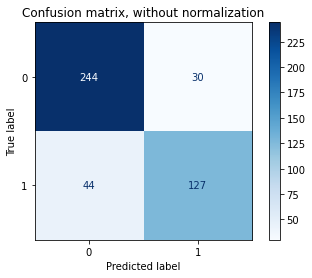

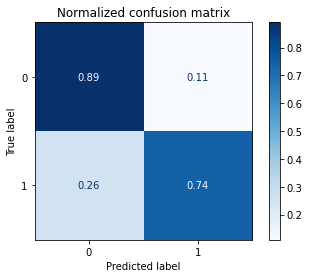

In [76]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
class_names = y.unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf_rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [78]:
from sklearn.metrics import classification_report
y_hat_rf = best_clf_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       274
           1       0.81      0.74      0.77       171

    accuracy                           0.83       445
   macro avg       0.83      0.82      0.82       445
weighted avg       0.83      0.83      0.83       445

